In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

sns.set_style("darkgrid")

In [ ]:
data = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(data[data["sex"]=="female"]["age"])
plt.title("Female age distribution")

plt.subplot(1,2,2)
sns.distplot(data[data["sex"]=="male"]["age"])
plt.title("Male age distribution")

plt.show()

# BMI

In [ ]:
temp = data.groupby("sex").mean()["bmi"]
print("Average BMI : \n a) Male : {}\n b) Female : {}".format(temp["male"], temp["female"]))

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data["bmi"])

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(data=data[data["sex"]=="female"], x="age", y="bmi", hue="region")
plt.title("Female bmi distribution")

plt.subplot(1,2,2)
sns.scatterplot(data=data[data["sex"]=="male"], x="age", y="bmi", hue="region")
plt.title("Male bmi distribution")

plt.show()

In [ ]:
temp = data.groupby(["region", "sex"]).agg({"bmi": ["count", "max", "min", "mean"]})
temp

According to Google :

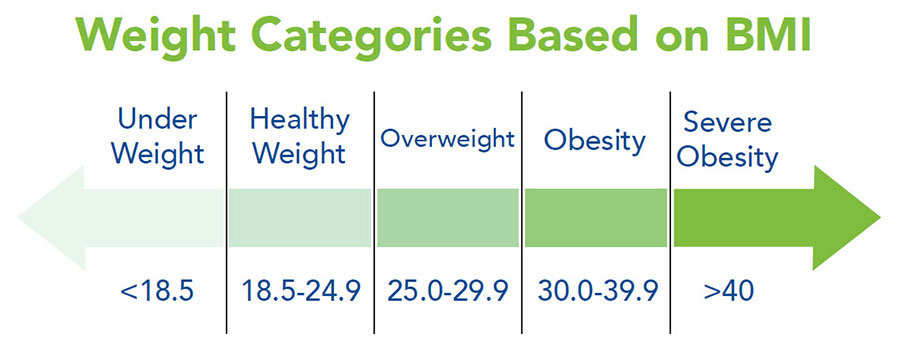

Charges distribution in people according to bmi index.

For overweight

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot according to bmi >=30")
sns.boxplot(y="sex", x="charges", data = data[data["bmi"]>=30])

For underweight

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot according to bmi")
sns.boxplot(y="sex", x="charges", data = data[data["bmi"]<=18.5])

# Smokers

In [ ]:
sns.scatterplot(data=data, x="bmi", y="charges", hue="smoker")  # This is very important feature

In [ ]:
sns.catplot(data=data, x="smoker",kind="count",hue = 'sex')

Money spend according to sex.

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot according to Sex")
sns.boxplot(y="sex", x="charges", data = data)

So male usually spend more then female on their health issues.

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(data[data["smoker"]=="yes"]["bmi"])
plt.title("Smoker bmi distribution")

plt.subplot(1,2,2)
sns.distplot(data[data["smoker"]=="no"]["bmi"])
plt.title("Non smoker bmi distribution")

plt.show()

In [ ]:
sns.catplot(data=data[data.age<=18], x="smoker",kind="count",hue = 'sex')
plt.title("Smoker vs Non smoker Kids")

I am interseted in cost of medical of teenagers.

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Cost pay by 18 years old's")
sns.boxplot(y="smoker", x="charges", data = data[(data.age <= 18)])

Here we can see that money spend by people who smoke are higher then the non-smokers, but there are some cases where we can see that non somkers spend money more then usual this might be due to some diseases etc.

In [ ]:
sns.jointplot(data = data[(data.smoker == "no")],x="age", y="charges",kind="kde")
plt.title("Non-Smoker charges distribution")
plt.show()

Steady growth in charges, I think it's natural.

In [ ]:
sns.jointplot(data = data[(data.smoker == "yes")],x="age", y="charges",kind="kde")
plt.title("Smoker charges distribution")   

In [ ]:
# assumptions :
# having no childern age is less than 27 are unmarried 

married = []
for i in range(len(data)):
    if data["age"].iloc[i]<=27 and data["children"].iloc[i]==0: married.append(False)
    else: married.append(True)
data["married"] = married

In [ ]:
sns.catplot(data=data, x="married",kind="count",hue = 'smoker')

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot according to married")
sns.boxplot(y="charges", x="married", data = data)

# Region

In [ ]:
sns.catplot(data=data, x="smoker", kind="count", hue="region")

In [ ]:
sns.catplot(data=data, x="children", kind="count", hue="region")

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot according to region")
sns.boxplot(y="region", x="charges", data = data)

People in the southeast region have more health issue as they seems more addicted to smoking.

In [ ]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)
#married
le.fit(data.married.drop_duplicates()) 
data.married = le.transform(data.married)

In [ ]:
data.head()

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=0.3, cmap="coolwarm")

In [ ]:
import math
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
y= data["charges"]
data = data.drop("charges", axis=1)
train, test , y_train, y_test = train_test_split(data, y, train_size=0.8)

In [ ]:
model = LinearRegression(normalize=True)
history = model.fit(train, y_train)
train_predict = model.predict(train)
predict = model.predict(test)
r2_score_linear_test = r2_score(y_test,predict)
r2_score_linear_train = r2_score(y_train,train_predict)
rmse_linear = math.sqrt(mean_squared_error(y_test, predict))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_linear)
print("R2 score on train : {} and on test : {} ".format(r2_score_linear_train, r2_score_linear_test))

In [ ]:
model = Ridge(alpha=.05)
history = model.fit(train, y_train)
train_predict = model.predict(train)
predict = model.predict(test)
r2_score_ridge_test = r2_score(y_test,predict)
r2_score_ridge_train = r2_score(y_train,train_predict)
rmse_ridge = math.sqrt(mean_squared_error(y_test, predict))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_ridge)
print("R2 score on train : {} and on test : {} ".format(r2_score_ridge_train, r2_score_ridge_test))

In [ ]:
model = Lasso(alpha=.05)
history = model.fit(train, y_train)
train_predict = model.predict(train)
predict = model.predict(test)
r2_score_lasso_test = r2_score(y_test,predict)
r2_score_lasso_train = r2_score(y_train,train_predict)
rmse_lasso = math.sqrt(mean_squared_error(y_test, predict))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_lasso)
print("R2 score on train : {} and on test : {} ".format(r2_score_lasso_train, r2_score_lasso_test))

In [ ]:
model = ElasticNet()
history = model.fit(train, y_train)
train_predict = model.predict(train)
predict = model.predict(test)
r2_score_elastic_test = r2_score(y_test,predict)
r2_score_elastic_train = r2_score(y_train,train_predict)
rmse_elastic = math.sqrt(mean_squared_error(y_test, predict))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_elastic)
print("R2 score on train : {} and on test : {} ".format(r2_score_elastic_train, r2_score_elastic_test))

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(data)
x_train_poly = poly_reg.fit_transform(train)
poly_reg.fit(x_train_poly, y_train)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(x_train_poly, y_train)

train_predict = regressor_poly2.predict(poly_reg.fit_transform(train))
predict = regressor_poly2.predict(poly_reg.fit_transform(test))

r2_score_poly2_train = r2_score(y_train, train_predict)
r2_score_poly2_test = r2_score(y_test, predict)
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, predict)))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_poly2)
print("R2 score on train : {} and on test : {} ".format(r2_score_poly2_train, r2_score_poly2_test))

In [ ]:
model = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=10, min_samples_split=2)
history = model.fit(train, y_train)
train_predict = model.predict(train)
predict = model.predict(test)
r2_score_dt_test = r2_score(y_test,predict)
r2_score_dt_train = r2_score(y_train,train_predict)
rmse_dt = math.sqrt(mean_squared_error(y_test, predict))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_dt)
print("R2 score on train : {} and on test : {} ".format(r2_score_dt_train, r2_score_dt_test))

In [ ]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                              max_features='auto', min_samples_leaf=10, min_samples_split=7, n_estimators=1200)
history = model.fit(train, y_train)
train_predict = model.predict(train)
predict = model.predict(test)
r2_score_rf_test = r2_score(y_test,predict)
r2_score_rf_train = r2_score(y_train,train_predict)
rmse_rf = math.sqrt(mean_squared_error(y_test, predict))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_rf)
print("R2 score on train : {} and on test : {} ".format(r2_score_rf_train, r2_score_rf_test))

In [ ]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test),
          ('Elastic Net Regression', rmse_elastic, r2_score_elastic_train, r2_score_elastic_test),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test)   
         ]
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)'])

In [ ]:
predict

In [ ]:
f, axe = plt.subplots(1,1, figsize=(12,6))

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, ax = axe, palette='inferno')
axe.set_xlabel('R2_Score(test)', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()